In [1]:
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv("Diabities.csv")

In [3]:
ds.head(5)

,Pregnancies,Glucose,blood pressure,skin thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   blood pressure            768 non-null    int64  
 3   skin thickness            768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
ds.isnull().sum()

Pregnancies                 0
Glucose                     0
blood pressure              0
skin thickness              0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
X= ds.iloc[:,:-1]
y = ds.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25, random_state = 0)

In [8]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier (n_estimators= 6, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
acc = round(accuracy_score(y_pred, y_test), 2)*100
print("Accuracy: ",acc)

Accuracy:  88.0


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

Accuracy score of the Decision Tree Classifier is: 88.0
Precision Score: 80.0
Recall Score: 88.88888888888889
F1 score of the model is 84.21052631578948


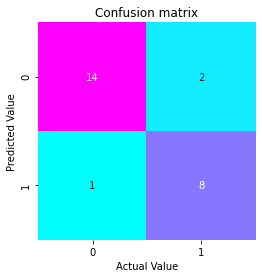

In [12]:
cm= confusion_matrix(y_test, tree_yhat)
sns.heatmap(cm, square=True, annot=True, cmap='cool', fmt='g', cbar=False)
plt.title('Confusion matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
print('Accuracy score of the Decision Tree Classifier is:', accuracy_score(y_test, tree_yhat)*100)
# calculate Precision
precision = precision_score(y_test, tree_yhat)
print('Precision Score:', precision*100)
# calculate recall
recall = recall_score(y_test, tree_yhat, average='binary')
print('Recall Score:', recall*100)
# calculate F1 Score
print('F1 score of the model is', f1_score(y_test, tree_yhat)*100)